# 03 - Análisis Exploratorio de Datos: Dengue Grave (Código 220)

**Proyecto:** EDA de Dengue en Colombia  
**Maestría en Inteligencia Artificial** - Desarrollo de Soluciones  

Este notebook realiza el análisis exploratorio de los casos de dengue grave (código SIVIGILA 220) para los años 2010, 2016, 2019, 2022 y 2024.

**Contenido:**
1. Distribución temporal de casos por año
2. Análisis por semanas epidemiológicas
3. Distribución geográfica
4. Distribución demográfica (edad, sexo)
5. Tasas de incidencia
6. Análisis de severidad: hospitalización, mortalidad y letalidad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, os.path.join('..', 'src'))
from utils import (
    cargar_dengue, cargar_dane, configurar_estilo,
    convertir_edad_anos, clasificar_grupo_etario,
    grafico_barras_por_ano, grafico_semana_epi,
    grafico_top_departamentos, grafico_piramide_edad_sexo,
    grafico_heatmap_dpto_ano, resumen_dataframe,
    COLORES_ANOS, PALETA_DENGUE, ANOS_DENGUE_GRAVE
)

configurar_estilo()
pd.set_option('display.max_columns', 50)

In [2]:
# Cargar datos
print('Cargando datos de Dengue Grave (220)...')
df = cargar_dengue(tipo='grave')

# Preprocesamiento
cols_fecha = ['FEC_NOT', 'INI_SIN', 'FEC_HOS', 'FEC_DEF', 'FECHA_NTO']
for col in cols_fecha:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df['edad_anos'] = convertir_edad_anos(df)
df['grupo_etario'] = clasificar_grupo_etario(df['edad_anos'])
df = df.drop_duplicates(subset=['CONSECUTIVE'], keep='first')

resumen_dataframe(df, 'Dengue Grave (220) - Limpio')

Cargando datos de Dengue Grave (220)...
  Cargando Datos_2010_220.xls... 9,753 registros, 72 columnas
  Cargando Datos_2016_220.xls... 899 registros, 72 columnas
  Cargando Datos_2019_220.xls... 1,348 registros, 72 columnas
  Cargando Datos_2022_220.xls... 1,340 registros, 72 columnas
  Cargando Datos_2024_220.xlsx... 3,016 registros, 72 columnas

  Total: 16,356 registros

  Resumen: Dengue Grave (220) - Limpio
  Dimensiones: 16,356 filas x 74 columnas
  Memoria: 30.6 MB
  Columnas con nulos: 21
    - nacionalidad: 10,652 (65.1%)
    - nombre_nacionalidad: 10,652 (65.1%)
    - COD_ASE: 1,763 (10.8%)
    - GRU_POB: 6,603 (40.4%)
    - nom_grupo: 10,652 (65.1%)
    - estrato: 10,652 (65.1%)
    - sem_ges: 12,000 (73.4%)
    - fuente: 11,544 (70.6%)
    - COD_PAIS_R: 12,000 (73.4%)
    - FEC_HOS: 2,294 (14.0%)
    - FEC_DEF: 16,224 (99.2%)
    - CER_DEF: 16,200 (99.0%)
    - CBMTE: 16,233 (99.2%)
    - FM_FUERZA: 16,346 (99.9%)
    - FM_UNIDAD: 16,346 (99.9%)
    - FM_GRADO: 16,346 (99.9

In [3]:
df_dane = cargar_dane()
print(f'DANE: {len(df_dane):,} municipios cargados')

DANE: 1,131 municipios cargados


## 1. Distribución Temporal de Casos por Año

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
grafico_barras_por_ano(df, titulo='Casos de Dengue Grave (220) por Año', ax=ax)
plt.tight_layout()
plt.show()

print('\nConteo de casos por año:')
print(df['ANO'].value_counts().sort_index().to_string())

## 2. Análisis por Semanas Epidemiológicas

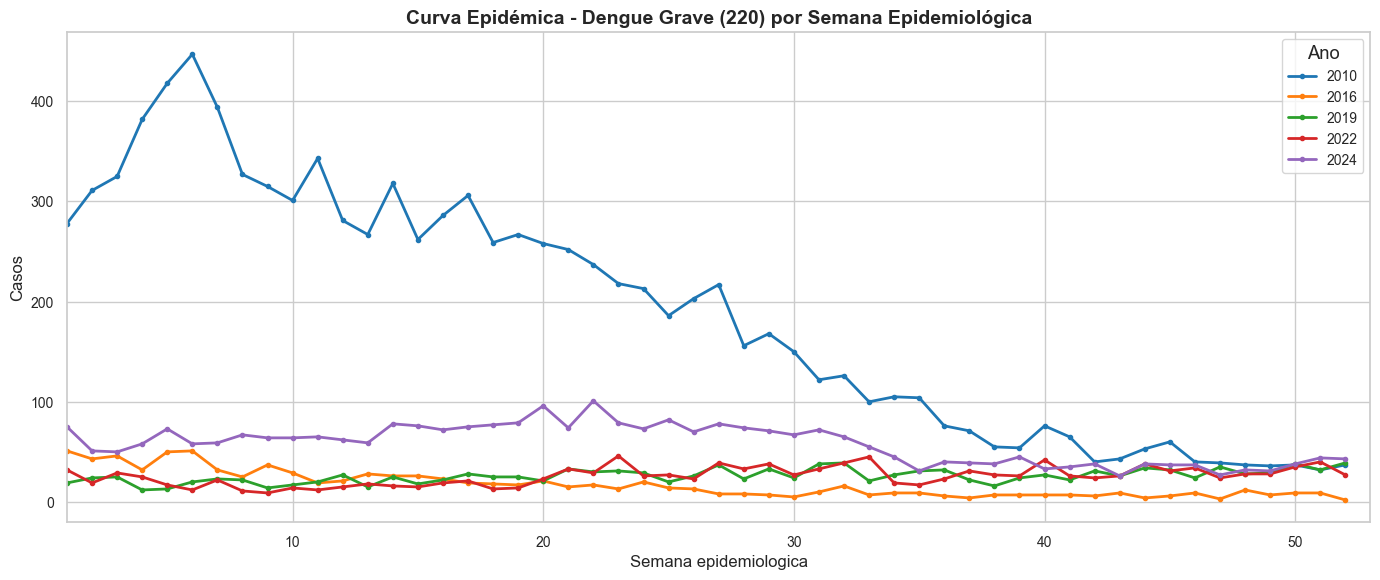

In [4]:
fig, ax = plt.subplots(figsize=(14, 6))
grafico_semana_epi(df, titulo='Curva Epidémica - Dengue Grave (220) por Semana Epidemiológica', ax=ax)
plt.tight_layout()
plt.show()

In [5]:
# Semanas con más casos por año
print('Semana epidemiológica con más casos por año:')
for ano in sorted(df['ANO'].unique()):
    datos_ano = df[df['ANO'] == ano]
    semana_pico = datos_ano['SEMANA'].value_counts().idxmax()
    casos_pico = datos_ano['SEMANA'].value_counts().max()
    print(f'  {ano}: Semana {semana_pico:2d} ({casos_pico:,} casos)')

Semana epidemiológica con más casos por año:
  2010: Semana  6 (447 casos)
  2016: Semana  1 (51 casos)
  2019: Semana 32 (39 casos)
  2022: Semana 23 (46 casos)
  2024: Semana 22 (101 casos)


## 3. Distribución Geográfica

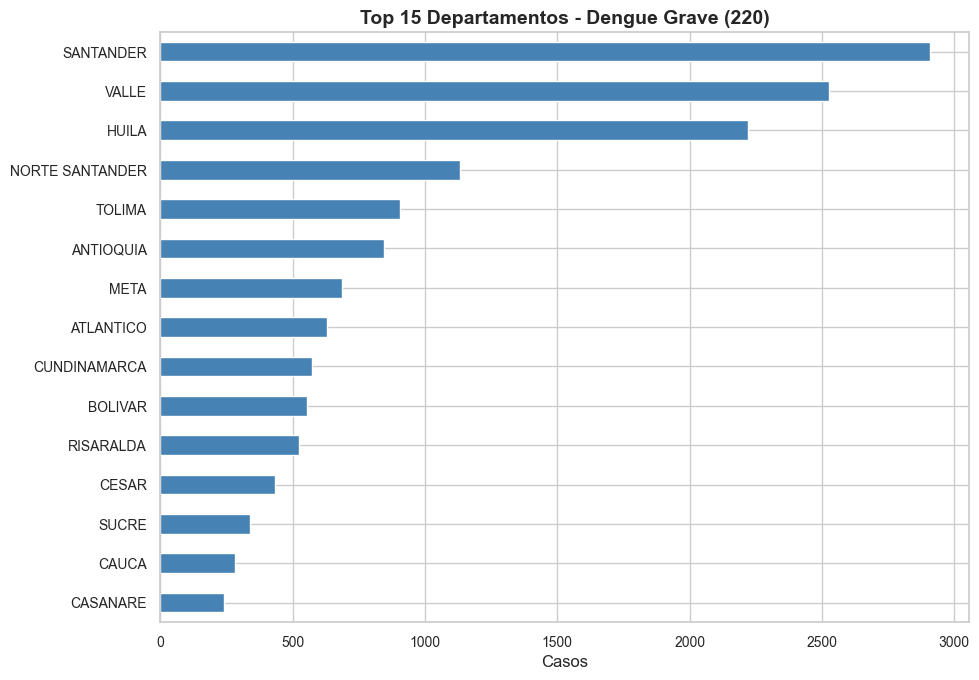

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
grafico_top_departamentos(df, top_n=15,
                          titulo='Top 15 Departamentos - Dengue Grave (220)', ax=ax)
plt.tight_layout()
plt.show()

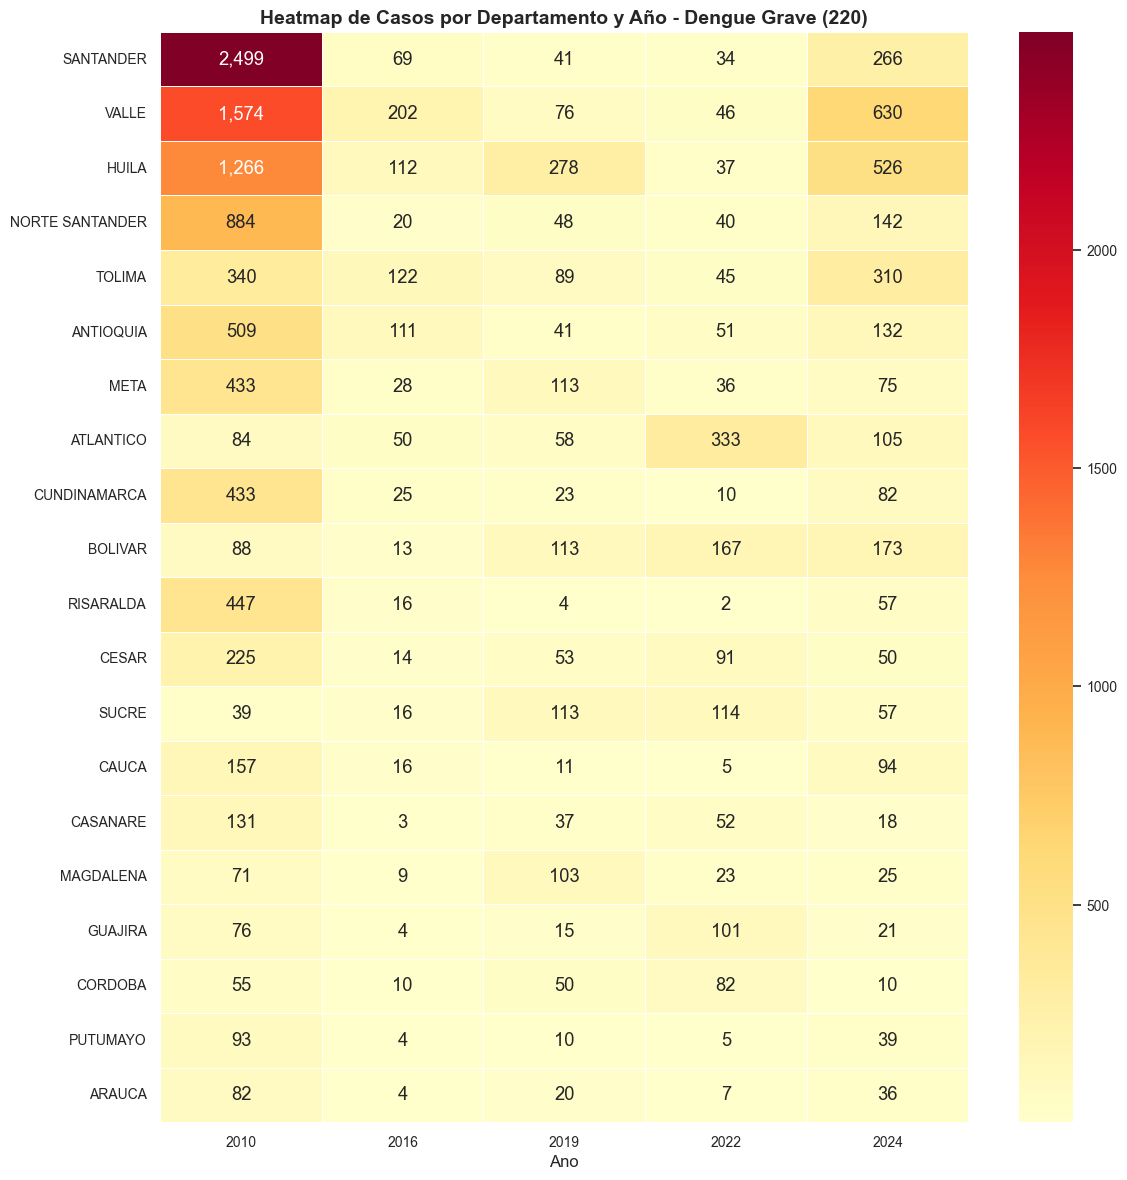

In [7]:
# Heatmap departamento vs año
fig, ax = plt.subplots(figsize=(12, 12))
grafico_heatmap_dpto_ano(df, top_n=20,
                          titulo='Heatmap de Casos por Departamento y Año - Dengue Grave (220)',
                          ax=ax)
plt.tight_layout()
plt.show()

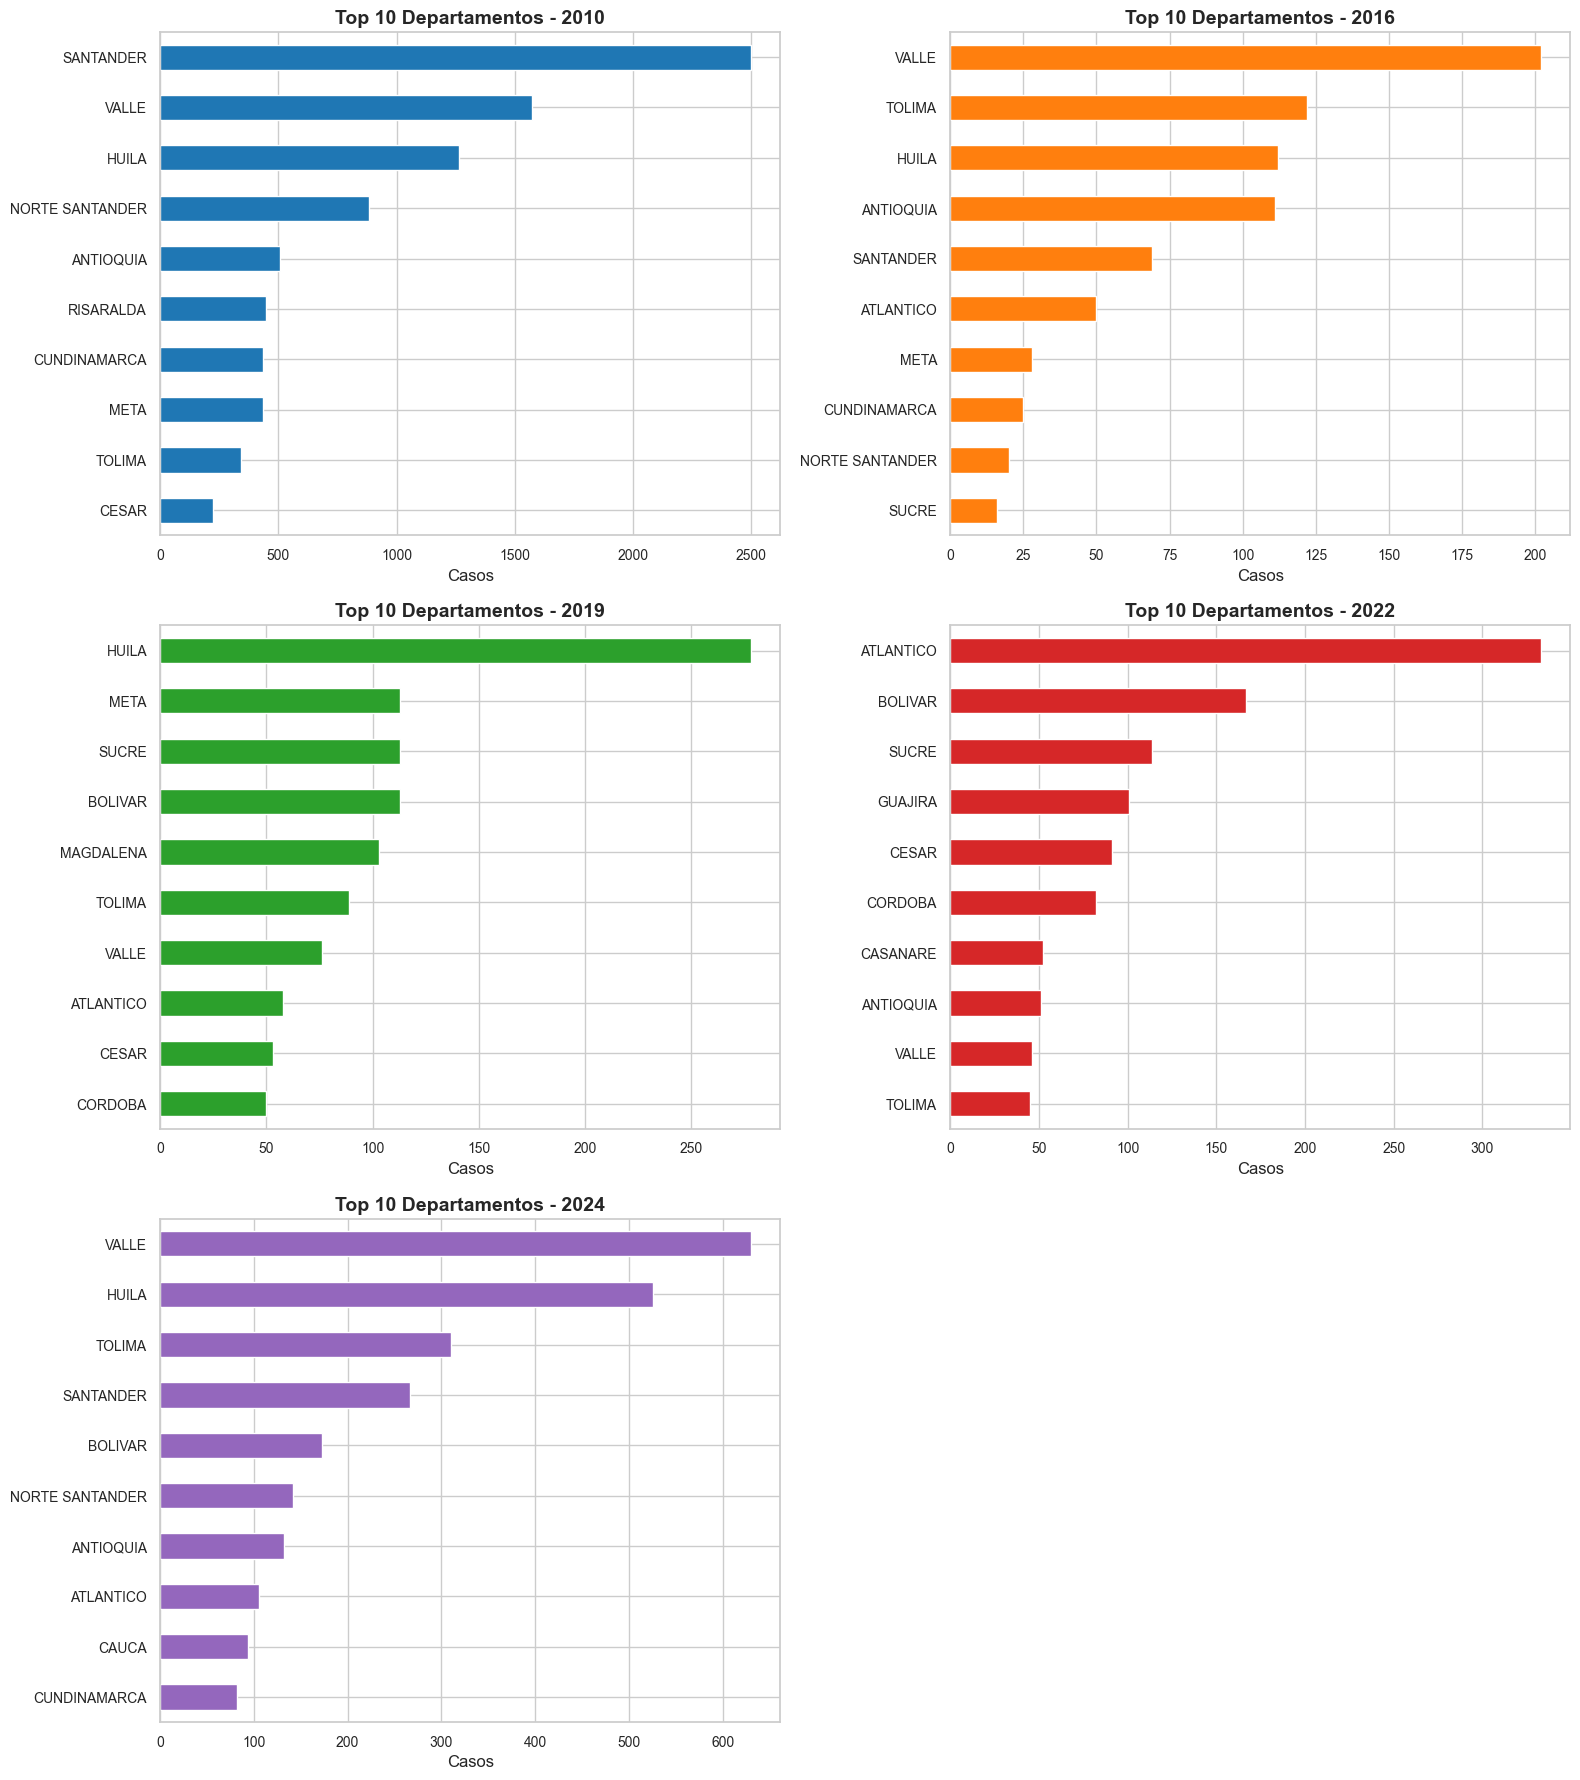

In [8]:
# Top departamentos por cada año
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
anos = sorted(df['ANO'].unique())

for idx, ano in enumerate(anos):
    ax = axes[idx // 2, idx % 2]
    datos_ano = df[df['ANO'] == ano]
    top = datos_ano['Departamento_ocurrencia'].value_counts().head(10)
    top.sort_values().plot(kind='barh', ax=ax, color=COLORES_ANOS.get(ano, 'firebrick'),
                           edgecolor='white')
    ax.set_title(f'Top 10 Departamentos - {ano}', fontweight='bold')
    ax.set_xlabel('Casos')
    ax.set_ylabel('')

# Ocultar subplot vacío si hay número impar de años
if len(anos) % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

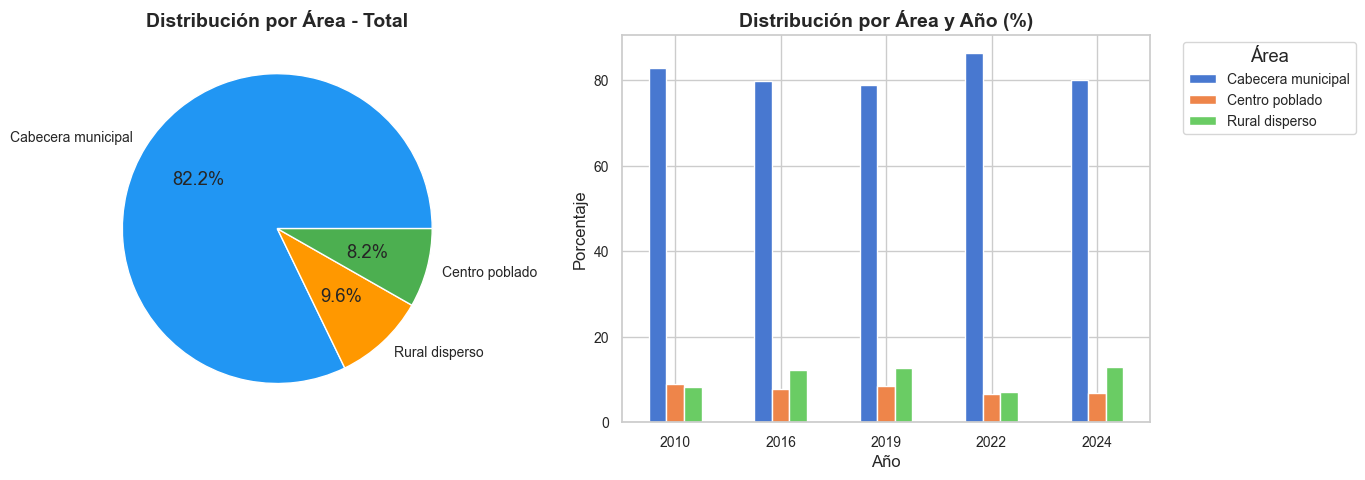

In [9]:
# Distribución urbano vs rural
area_map = {1: 'Cabecera municipal', 2: 'Centro poblado', 3: 'Rural disperso'}
df['area_nombre'] = df['AREA'].map(area_map)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['area_nombre'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%',
                                       colors=['#2196F3', '#FF9800', '#4CAF50'])
axes[0].set_title('Distribución por Área - Total', fontweight='bold')
axes[0].set_ylabel('')

tabla_area = pd.crosstab(df['ANO'], df['area_nombre'], normalize='index') * 100
tabla_area.plot(kind='bar', ax=axes[1], edgecolor='white')
axes[1].set_title('Distribución por Área y Año (%)', fontweight='bold')
axes[1].set_ylabel('Porcentaje')
axes[1].set_xlabel('Año')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Área', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

## 4. Distribución Demográfica

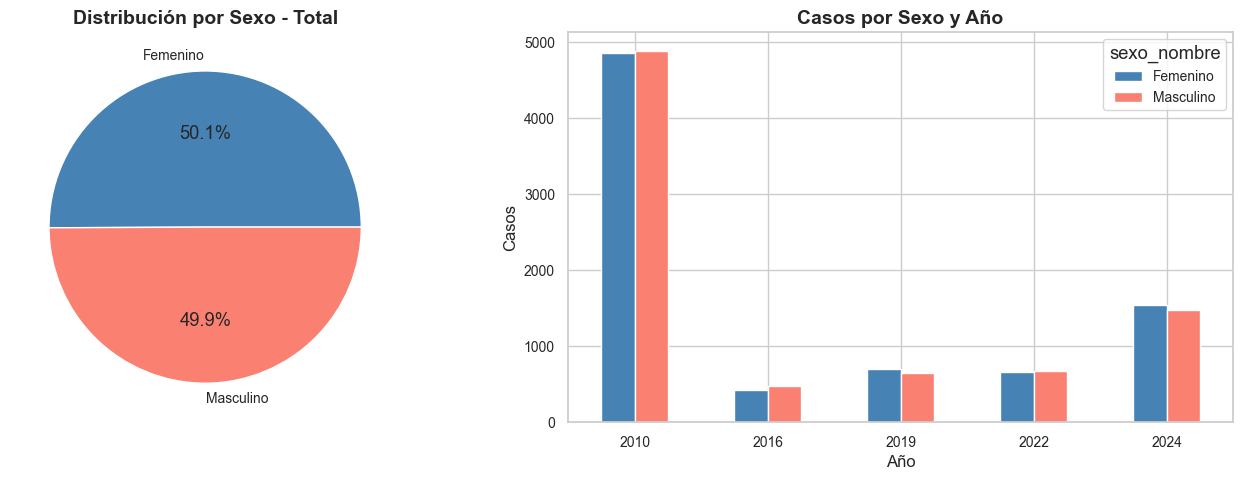

In [10]:
# Distribución por sexo
sexo_map = {'M': 'Masculino', 'F': 'Femenino'}
df['sexo_nombre'] = df['SEXO'].map(sexo_map)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['sexo_nombre'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%',
                                       colors=['steelblue', 'salmon'])
axes[0].set_title('Distribución por Sexo - Total', fontweight='bold')
axes[0].set_ylabel('')

tabla_sexo = pd.crosstab(df['ANO'], df['sexo_nombre'])
tabla_sexo.plot(kind='bar', ax=axes[1], color=['steelblue', 'salmon'], edgecolor='white')
axes[1].set_title('Casos por Sexo y Año', fontweight='bold')
axes[1].set_ylabel('Casos')
axes[1].set_xlabel('Año')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

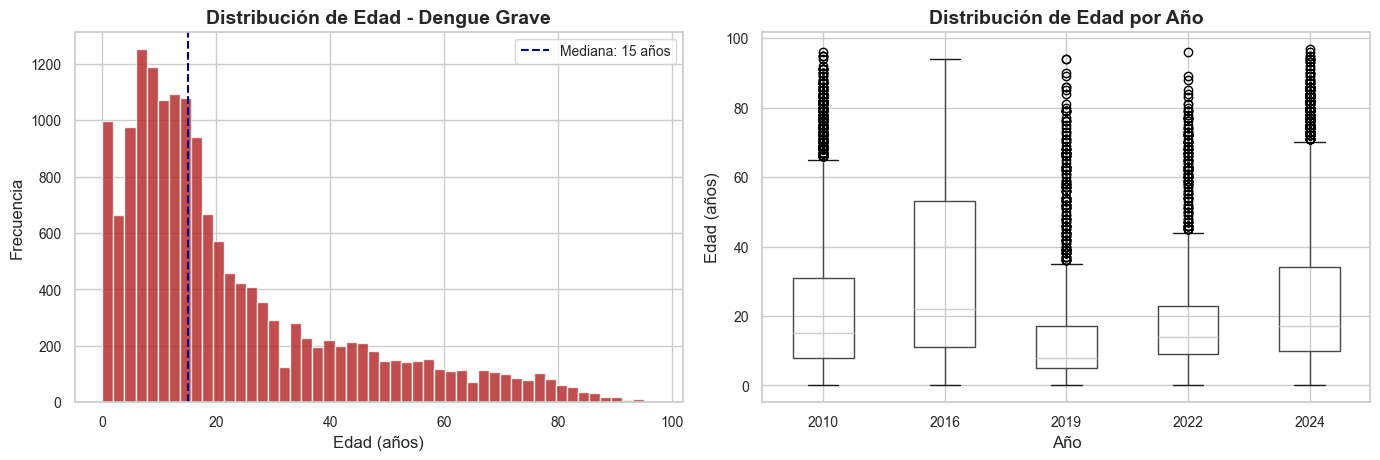

In [11]:
# Distribución de edad
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['edad_anos'].dropna().clip(0, 100).hist(bins=50, ax=axes[0], color='firebrick',
                                            edgecolor='white', alpha=0.8)
axes[0].set_title('Distribución de Edad - Dengue Grave', fontweight='bold')
axes[0].set_xlabel('Edad (años)')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df['edad_anos'].median(), color='navy', linestyle='--',
                label=f'Mediana: {df["edad_anos"].median():.0f} años')
axes[0].legend()

df.boxplot(column='edad_anos', by='ANO', ax=axes[1])
axes[1].set_title('Distribución de Edad por Año', fontweight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Edad (años)')
plt.suptitle('')

plt.tight_layout()
plt.show()

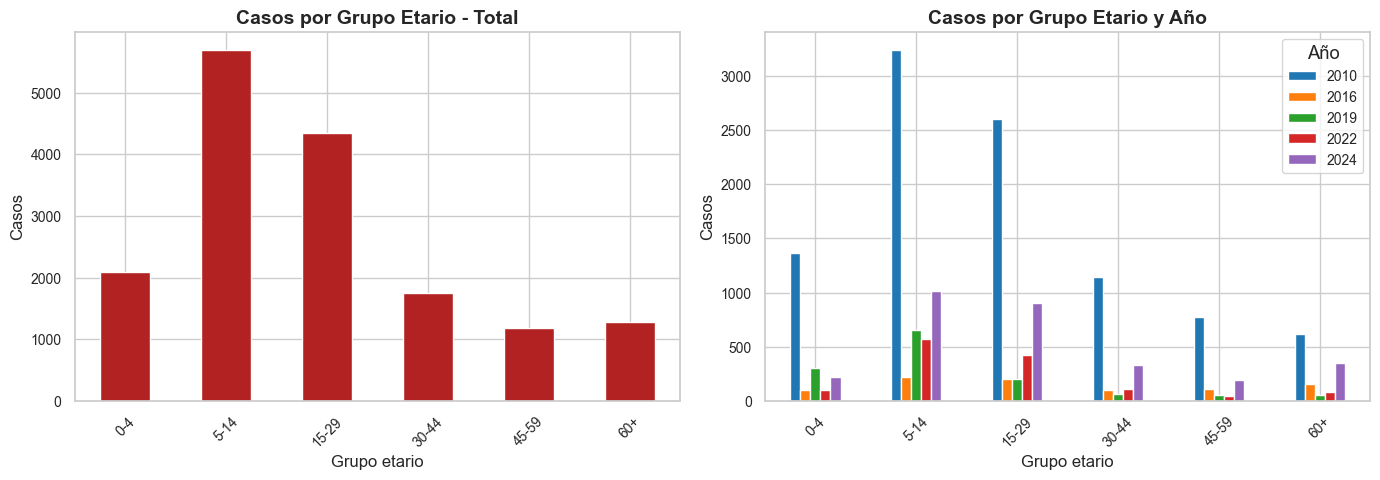

In [12]:
# Distribución por grupo etario
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['grupo_etario'].value_counts().sort_index().plot(kind='bar', ax=axes[0],
                                                     color='firebrick', edgecolor='white')
axes[0].set_title('Casos por Grupo Etario - Total', fontweight='bold')
axes[0].set_ylabel('Casos')
axes[0].set_xlabel('Grupo etario')
axes[0].tick_params(axis='x', rotation=45)

tabla_edad = pd.crosstab(df['grupo_etario'], df['ANO'])
tabla_edad.plot(kind='bar', ax=axes[1], edgecolor='white',
                color=[COLORES_ANOS.get(a, '#333') for a in sorted(df['ANO'].unique())])
axes[1].set_title('Casos por Grupo Etario y Año', fontweight='bold')
axes[1].set_ylabel('Casos')
axes[1].set_xlabel('Grupo etario')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Año')

plt.tight_layout()
plt.show()

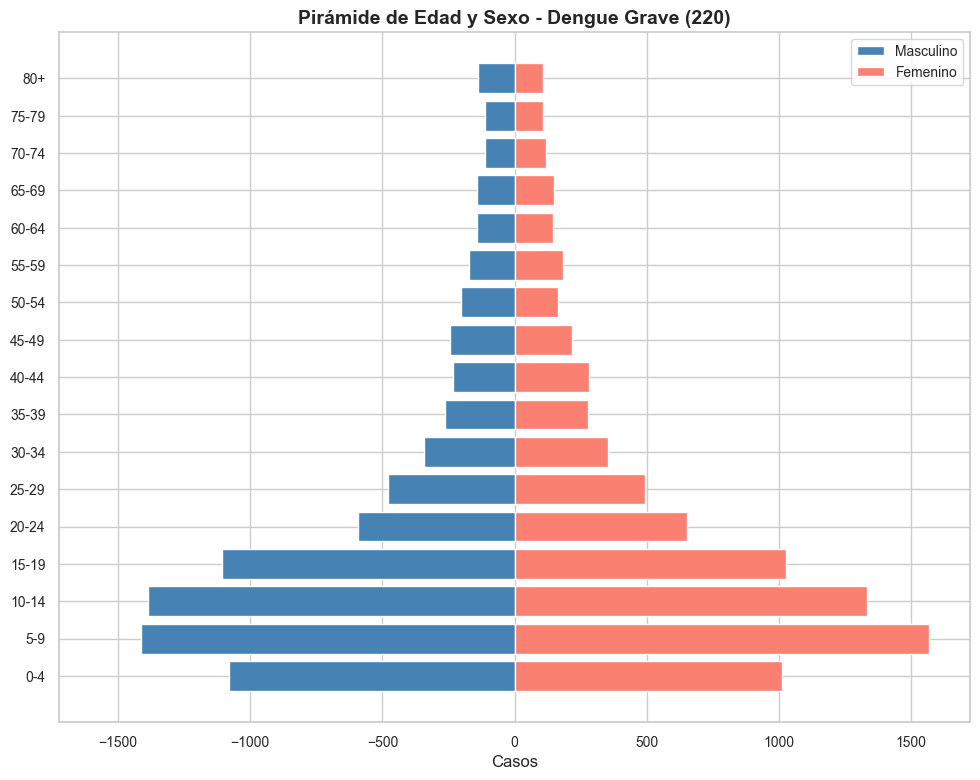

In [13]:
# Pirámide poblacional
fig, ax = plt.subplots(figsize=(10, 8))
grafico_piramide_edad_sexo(df, titulo='Pirámide de Edad y Sexo - Dengue Grave (220)', ax=ax)
plt.tight_layout()
plt.show()

## 5. Tasas de Incidencia

In [14]:
# Población por departamento
pob_dpto = df_dane.groupby('departamento').agg({
    'pob_2010': 'sum',
    'pob_2016': 'sum',
    'pob_2019': 'sum',
    'pob_2020': 'sum',
}).reset_index()
pob_dpto['departamento'] = pob_dpto['departamento'].str.upper().str.strip()

# Casos por departamento y año
casos_dpto_ano = df.groupby(['Departamento_ocurrencia', 'ANO']).size().reset_index(name='casos')
casos_dpto_ano['dpto_upper'] = casos_dpto_ano['Departamento_ocurrencia'].str.upper().str.strip()

def obtener_poblacion(row):
    ano = row['ANO']
    dpto = row['dpto_upper']
    match = pob_dpto[pob_dpto['departamento'] == dpto]
    if len(match) == 0:
        return np.nan
    if ano == 2010:
        return match['pob_2010'].values[0]
    elif ano == 2016:
        return match['pob_2016'].values[0]
    elif ano == 2019:
        return match['pob_2019'].values[0]
    else:
        return match['pob_2020'].values[0]

casos_dpto_ano['poblacion'] = casos_dpto_ano.apply(obtener_poblacion, axis=1)
casos_dpto_ano['tasa_incidencia'] = (casos_dpto_ano['casos'] / casos_dpto_ano['poblacion']) * 100000

print('Tasas de incidencia de dengue grave calculadas.')

Tasas de incidencia de dengue grave calculadas.


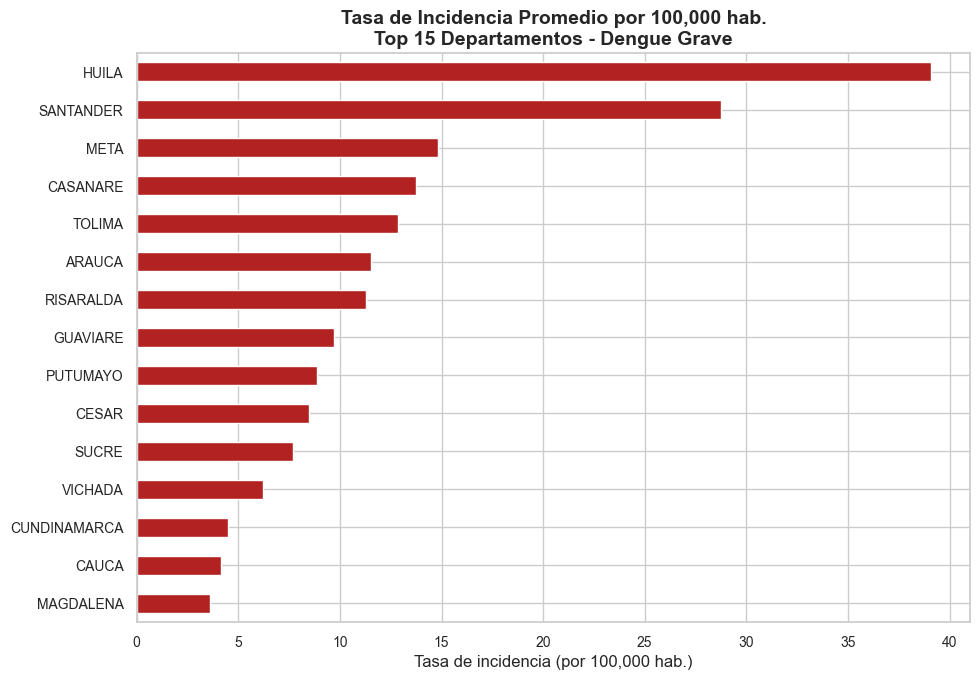

In [15]:
# Top departamentos por tasa de incidencia
tasa_prom = (casos_dpto_ano.dropna(subset=['tasa_incidencia'])
             .groupby('Departamento_ocurrencia')['tasa_incidencia']
             .mean()
             .sort_values(ascending=False)
             .head(15))

fig, ax = plt.subplots(figsize=(10, 7))
tasa_prom.sort_values().plot(kind='barh', ax=ax, color='firebrick', edgecolor='white')
ax.set_title('Tasa de Incidencia Promedio por 100,000 hab.\nTop 15 Departamentos - Dengue Grave',
             fontweight='bold')
ax.set_xlabel('Tasa de incidencia (por 100,000 hab.)')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

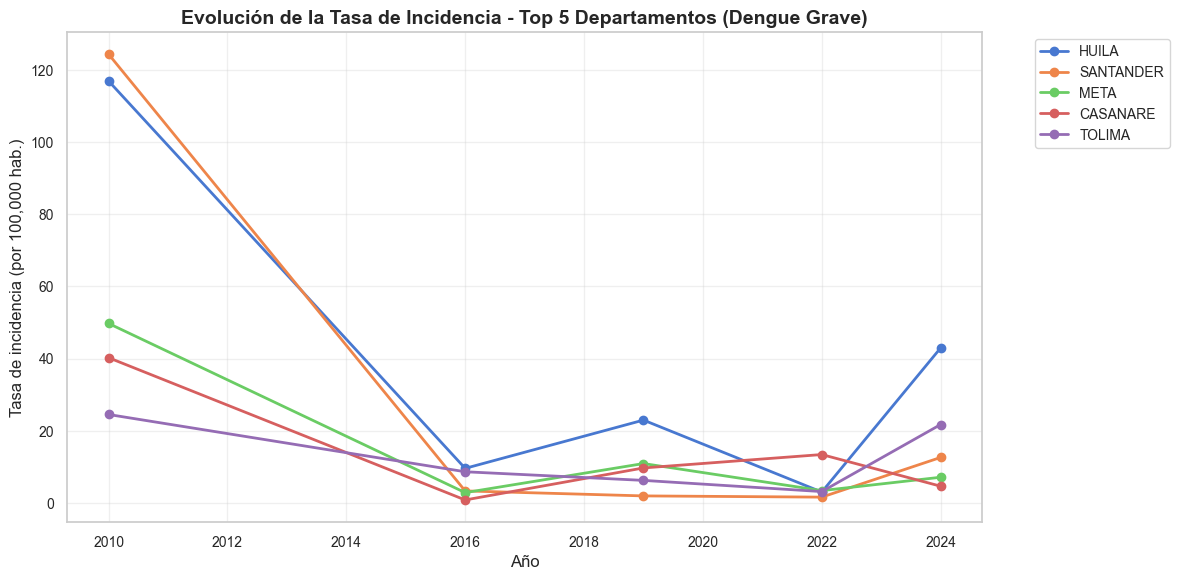

In [16]:
# Evolución de la tasa en top 5 departamentos
top5_dptos = tasa_prom.head(5).index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
for dpto in top5_dptos:
    datos = casos_dpto_ano[casos_dpto_ano['Departamento_ocurrencia'] == dpto]
    ax.plot(datos['ANO'], datos['tasa_incidencia'], marker='o', linewidth=2, label=dpto)

ax.set_title('Evolución de la Tasa de Incidencia - Top 5 Departamentos (Dengue Grave)',
             fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Tasa de incidencia (por 100,000 hab.)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Análisis de Severidad: Hospitalización, Mortalidad y Letalidad

El dengue grave por definición es una forma severa de la enfermedad. Analizamos indicadores de severidad.

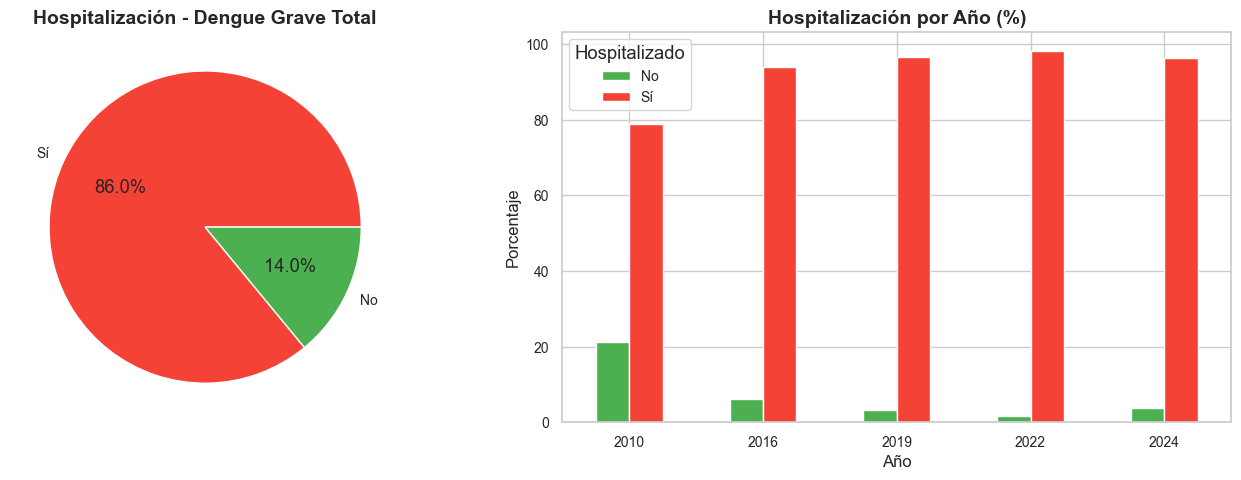

In [17]:
# Hospitalización
pac_hos_map = {1: 'Sí', 2: 'No', 3: 'No sabe'}
df['hospitalizado'] = df['PAC_HOS'].map(pac_hos_map)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['hospitalizado'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%',
                                         colors=['#f44336', '#4CAF50', '#9E9E9E'])
axes[0].set_title('Hospitalización - Dengue Grave Total', fontweight='bold')
axes[0].set_ylabel('')

tabla_hos = pd.crosstab(df['ANO'], df['hospitalizado'], normalize='index') * 100
tabla_hos.plot(kind='bar', ax=axes[1], edgecolor='white',
               color=['#4CAF50', '#f44336', '#9E9E9E'])
axes[1].set_title('Hospitalización por Año (%)', fontweight='bold')
axes[1].set_ylabel('Porcentaje')
axes[1].set_xlabel('Año')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Hospitalizado')

plt.tight_layout()
plt.show()

In [18]:
# Condición final y letalidad
con_fin_map = {1: 'Vivo', 2: 'Muerto', 3: 'No sabe', 9: 'Sin dato'}
df['condicion_final'] = df['CON_FIN'].map(con_fin_map)

print('Condición final de los casos de dengue grave:')
for val, count in df['condicion_final'].value_counts().items():
    pct = count / len(df) * 100
    print(f'  {val}: {count:,} ({pct:.2f}%)')

# Tasa de letalidad por año
print(f'\nTasa de letalidad por año:')
for ano in sorted(df['ANO'].unique()):
    datos_ano = df[df['ANO'] == ano]
    muertos = (datos_ano['CON_FIN'] == 2).sum()
    total = len(datos_ano)
    letalidad = muertos / total * 100 if total > 0 else 0
    print(f'  {ano}: {muertos} muertes / {total:,} casos = {letalidad:.2f}%')

Condición final de los casos de dengue grave:
  Vivo: 16,201 (99.05%)
  Muerto: 155 (0.95%)

Tasa de letalidad por año:
  2010: 49 muertes / 9,753 casos = 0.50%
  2016: 73 muertes / 899 casos = 8.12%
  2019: 33 muertes / 1,348 casos = 2.45%
  2022: 0 muertes / 1,340 casos = 0.00%
  2024: 0 muertes / 3,016 casos = 0.00%


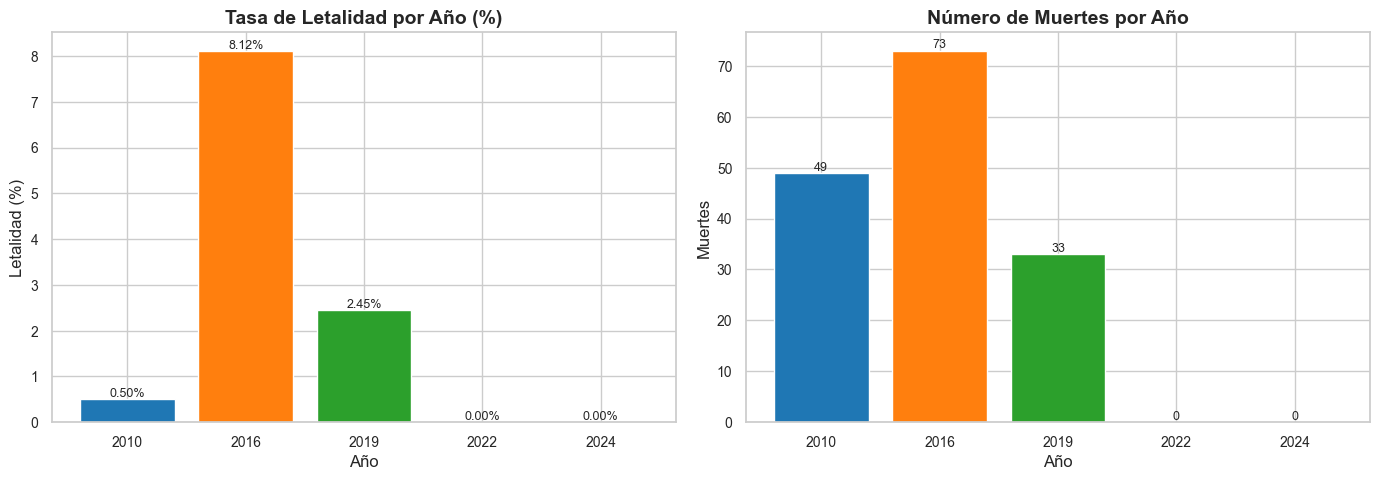

In [20]:
# Gráfico de letalidad por año
letalidad_por_ano = []
for ano in sorted(df['ANO'].unique()):
    datos_ano = df[df['ANO'] == ano]
    muertos = (datos_ano['CON_FIN'] == 2).sum()
    total = len(datos_ano)
    letalidad_por_ano.append({'ano': ano, 'letalidad': muertos / total * 100, 'muertes': muertos})

df_let = pd.DataFrame(letalidad_por_ano)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tasa de letalidad
colores = [COLORES_ANOS.get(a, '#333') for a in df_let['ano']]
axes[0].bar(df_let['ano'].astype(str), df_let['letalidad'], color=colores, edgecolor='white')
axes[0].set_title('Tasa de Letalidad por Año (%)', fontweight='bold')
axes[0].set_ylabel('Letalidad (%)')
axes[0].set_xlabel('Año')
for i, row in df_let.iterrows():
    axes[0].text(i, row['letalidad'] + 0.05, f'{row["letalidad"]:.2f}%',
                 ha='center', fontsize=9)

# Número absoluto de muertes
axes[1].bar(df_let['ano'].astype(str), df_let['muertes'], color=colores, edgecolor='white')
axes[1].set_title('Número de Muertes por Año', fontweight='bold')
axes[1].set_ylabel('Muertes')
axes[1].set_xlabel('Año')
for i, row in df_let.iterrows():
    axes[1].text(i, row['muertes'] + 0.5, f'{int(row["muertes"])}',
                 ha='center', fontsize=9)

plt.tight_layout()
plt.show()

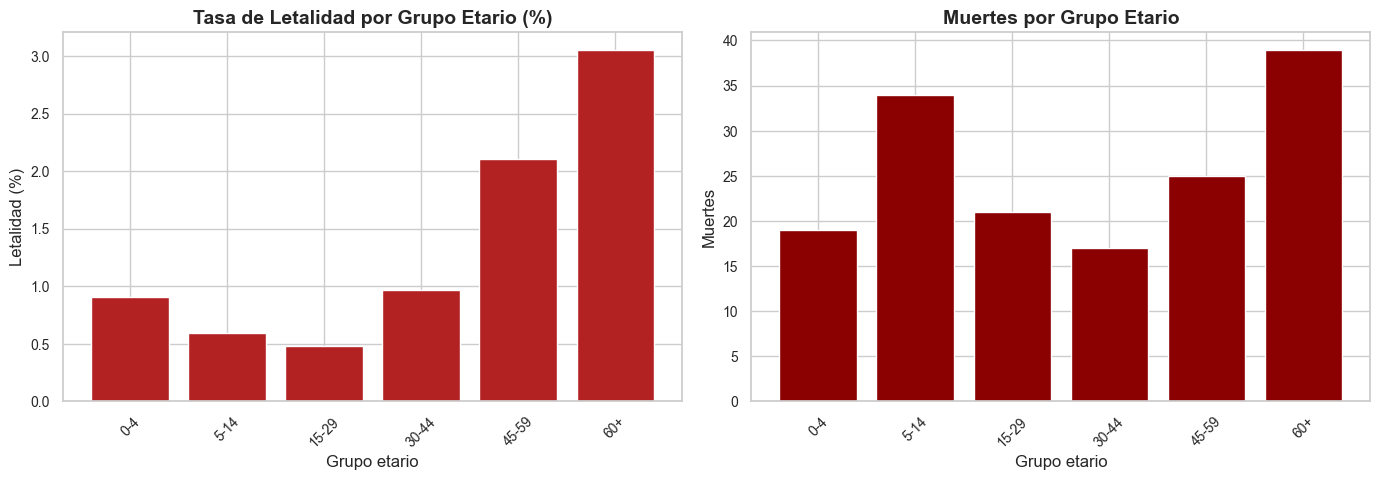


Letalidad por grupo etario:
grupo  casos  muertes  letalidad
  0-4   2093       19   0.907788
 5-14   5701       34   0.596387
15-29   4345       21   0.483314
30-44   1752       17   0.970320
45-59   1187       25   2.106150
  60+   1276       39   3.056426


In [21]:
# Letalidad por grupo etario
letalidad_edad = []
for grupo in df['grupo_etario'].cat.categories:
    datos = df[df['grupo_etario'] == grupo]
    if len(datos) > 0:
        muertos = (datos['CON_FIN'] == 2).sum()
        letalidad_edad.append({
            'grupo': grupo,
            'casos': len(datos),
            'muertes': muertos,
            'letalidad': muertos / len(datos) * 100
        })

df_let_edad = pd.DataFrame(letalidad_edad)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(df_let_edad['grupo'].astype(str), df_let_edad['letalidad'],
            color='firebrick', edgecolor='white')
axes[0].set_title('Tasa de Letalidad por Grupo Etario (%)', fontweight='bold')
axes[0].set_ylabel('Letalidad (%)')
axes[0].set_xlabel('Grupo etario')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(df_let_edad['grupo'].astype(str), df_let_edad['muertes'],
            color='darkred', edgecolor='white')
axes[1].set_title('Muertes por Grupo Etario', fontweight='bold')
axes[1].set_ylabel('Muertes')
axes[1].set_xlabel('Grupo etario')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print('\nLetalidad por grupo etario:')
print(df_let_edad.to_string(index=False))

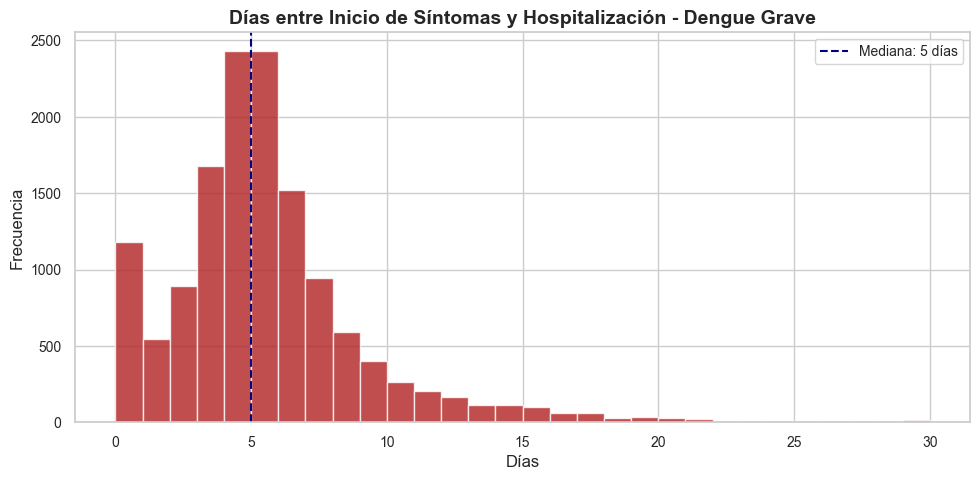


Días entre inicio de síntomas y hospitalización:
  Mediana: 5 días
  Media: 5.1 días
  Rango: 0 - 30 días


In [22]:
# Tiempo entre inicio de síntomas y hospitalización
df['dias_hospitalizacion'] = (df['FEC_HOS'] - df['INI_SIN']).dt.days

# Filtrar valores razonables (0-30 días)
dias_validos = df['dias_hospitalizacion'].dropna()
dias_validos = dias_validos[(dias_validos >= 0) & (dias_validos <= 30)]

fig, ax = plt.subplots(figsize=(10, 5))
dias_validos.hist(bins=30, ax=ax, color='firebrick', edgecolor='white', alpha=0.8)
ax.set_title('Días entre Inicio de Síntomas y Hospitalización - Dengue Grave', fontweight='bold')
ax.set_xlabel('Días')
ax.set_ylabel('Frecuencia')
ax.axvline(dias_validos.median(), color='navy', linestyle='--',
           label=f'Mediana: {dias_validos.median():.0f} días')
ax.legend()
plt.tight_layout()
plt.show()

print(f'\nDías entre inicio de síntomas y hospitalización:')
print(f'  Mediana: {dias_validos.median():.0f} días')
print(f'  Media: {dias_validos.mean():.1f} días')
print(f'  Rango: {dias_validos.min():.0f} - {dias_validos.max():.0f} días')

Estado final de caso - Dengue Grave:
nom_est_f_caso
Confirmado por laboratorio            11506
Probable                               4458
Confirmado por Nexo Epidemiológico      392


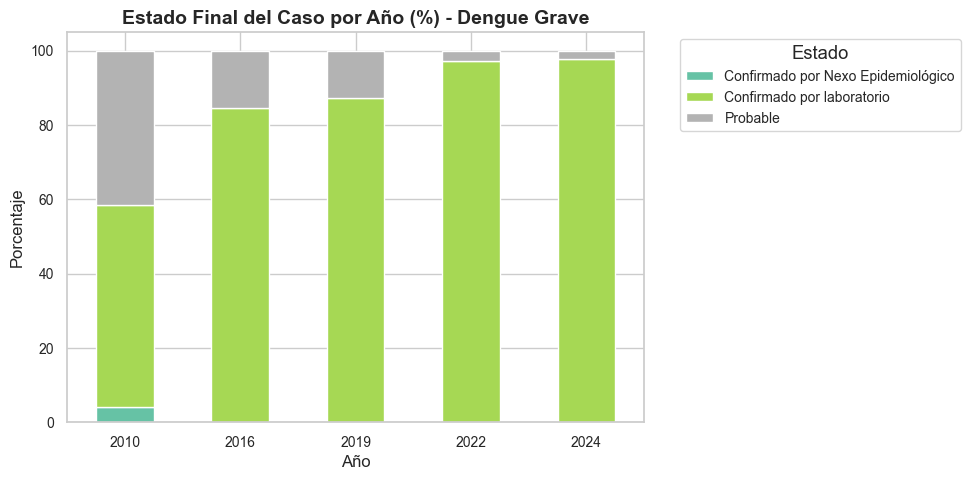

In [23]:
# Estado final del caso
print('Estado final de caso - Dengue Grave:')
print(df['nom_est_f_caso'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(10, 5))
tabla_estado = pd.crosstab(df['ANO'], df['nom_est_f_caso'], normalize='index') * 100
tabla_estado.plot(kind='bar', stacked=True, ax=ax, edgecolor='white', cmap='Set2')
ax.set_title('Estado Final del Caso por Año (%) - Dengue Grave', fontweight='bold')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Año')
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 7. Resumen del EDA - Dengue Grave

In [24]:
print('='*60)
print('  RESUMEN EDA - DENGUE GRAVE (220)')
print('='*60)

print(f'\nTotal de registros analizados: {len(df):,}')
print(f'Años: {sorted(df["ANO"].unique())}')

print(f'\nDistribución temporal:')
for ano in sorted(df['ANO'].unique()):
    n = (df['ANO'] == ano).sum()
    print(f'  {ano}: {n:>6,} casos')

top3_dpto = df['Departamento_ocurrencia'].value_counts().head(3)
print(f'\nTop 3 departamentos (total):')
for dpto, n in top3_dpto.items():
    print(f'  {dpto}: {n:,} casos')

print(f'\nDemografía:')
print(f'  Edad mediana: {df["edad_anos"].median():.0f} años')
sexo_pct = df['sexo_nombre'].value_counts(normalize=True) * 100
for s, p in sexo_pct.items():
    print(f'  {s}: {p:.1f}%')

print(f'\nSeveridad:')
total_muertos = (df['CON_FIN'] == 2).sum()
total_hosp = (df['PAC_HOS'] == 1).sum()
print(f'  Hospitalizados: {total_hosp:,} ({total_hosp/len(df)*100:.1f}%)')
print(f'  Fallecidos: {total_muertos:,} ({total_muertos/len(df)*100:.2f}%)')
print(f'  Grupo etario más afectado: {df["grupo_etario"].value_counts().idxmax()}')

  RESUMEN EDA - DENGUE GRAVE (220)

Total de registros analizados: 16,356
Años: [np.int64(2010), np.int64(2016), np.int64(2019), np.int64(2022), np.int64(2024)]

Distribución temporal:
  2010:  9,753 casos
  2016:    899 casos
  2019:  1,348 casos
  2022:  1,340 casos
  2024:  3,016 casos

Top 3 departamentos (total):
  SANTANDER: 2,909 casos
  VALLE: 2,528 casos
  HUILA: 2,219 casos

Demografía:
  Edad mediana: 15 años
  Femenino: 50.1%
  Masculino: 49.9%

Severidad:
  Hospitalizados: 14,062 (86.0%)
  Fallecidos: 155 (0.95%)
  Grupo etario más afectado: 5-14
